## <font color=green>Day-10</font>

- Our topic of discussion is <font color=green size="4">**Support Vector Machine for Classification**</font>
- Dataset That we would be using : Voice.csv
    - The Dataset has already been downloaded and is placed in the folder ./Dataset/Classification/
    - Incase if you face any problems, you can download that dataset from kaggle using the link https://www.kaggle.com/datasets/primaryobjects/voicegender/download?datasetVersionNumber=1
    
- Sections
    0. **Learning Contents about Support Vector Machines Classification**
    1. Importing Headers
    2. Importing Data
    3. Data Exploration
    4. EDA
    5. Data Preparation
    6. Modelling & Model Evaluation
        - Linear Kernel
        - Polynomial Kernel (Degree 2)
        - Radial Kernel
        - Sigmoid
  
    7. Cross Validation
    8. Hyper Parameter Tuning
    8. Conclusion
    
- Further Study
    - Hyper Parameter C, gama Tuning


### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

## Learning

- Quick Intro
    - CAN BE USED FOR BOTH CLASSIFICATION AND REGRESSION
    - Support Vector Classifier makes a decision boundary and divides the data into **2 classes** leaving a space for miscalculations
    - Decision Boundary and Margin
    - Support Vector Classifier performs Cross Validation with all the points and finds out the optimal set of support vectors
    - Incase If the data points are not linearly seperable. Then Support Vector Machines Come into Role
    - The idea is to tranform the data to a higher dimensional space and create a boundary
    - Kernals calculate the cost without directly transforming into higher dimensions
        - There are different types of kernals. All does the same task but at different dimension
            - Linear Kernal
            - Poly kernal. Where you specify the space dimensions to transform the data
            - Radial kernal. Which has infinite dimensions to transform the data
            - Sigmoid kernel
            
- Pretty Fast Highlights (**55 sec**) : [Video](https://www.reddit.com/r/learnmachinelearning/comments/he8yjz/support_vector_machines_all_you_need_to_know/?utm_source=share&utm_medium=web2x&context=3)

- Study Sources or References
    - Youtube
        - [Part-1](https://www.youtube.com/watch?v=efR1C6CvhmE), [Part-2](https://www.youtube.com/watch?v=Toet3EiSFcM), [Part-3](https://www.youtube.com/watch?v=Qc5IyLW_hns)
    - Blogs
        - [Kaggle](https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook)
        - [Towards Data Science](https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85)
    - Code
        - [Kaggle](https://www.kaggle.com/code/nirajvermafcb/support-vector-machine-detail-analysis)

### 1. Importing Headers

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Encoders and Scalars
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Modelling Libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Cross Validation Libraries
from sklearn.model_selection import cross_val_score

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

/Users/saikarna/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Importing Data

In [2]:
# Importing Data
df = pd.read_csv("./Dataset/Classification/voice.csv")
print("The shape of the dataset is {0} rows and {1} cols".format(df.shape[0],df.shape[1]))
print(list(df.columns))
df.head(5)

The shape of the dataset is 3168 rows and 21 cols
['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


### <font color=green>Inferences</font>
- We have 3168 rows and 21 features
- Our Target Feature is "label"
- 20 Float Type, 1 String type

### 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
# Label Encoding
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["label"])

In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### <font color=green>Inferences</font>
- All clear for EDA

### 4. EDA

In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


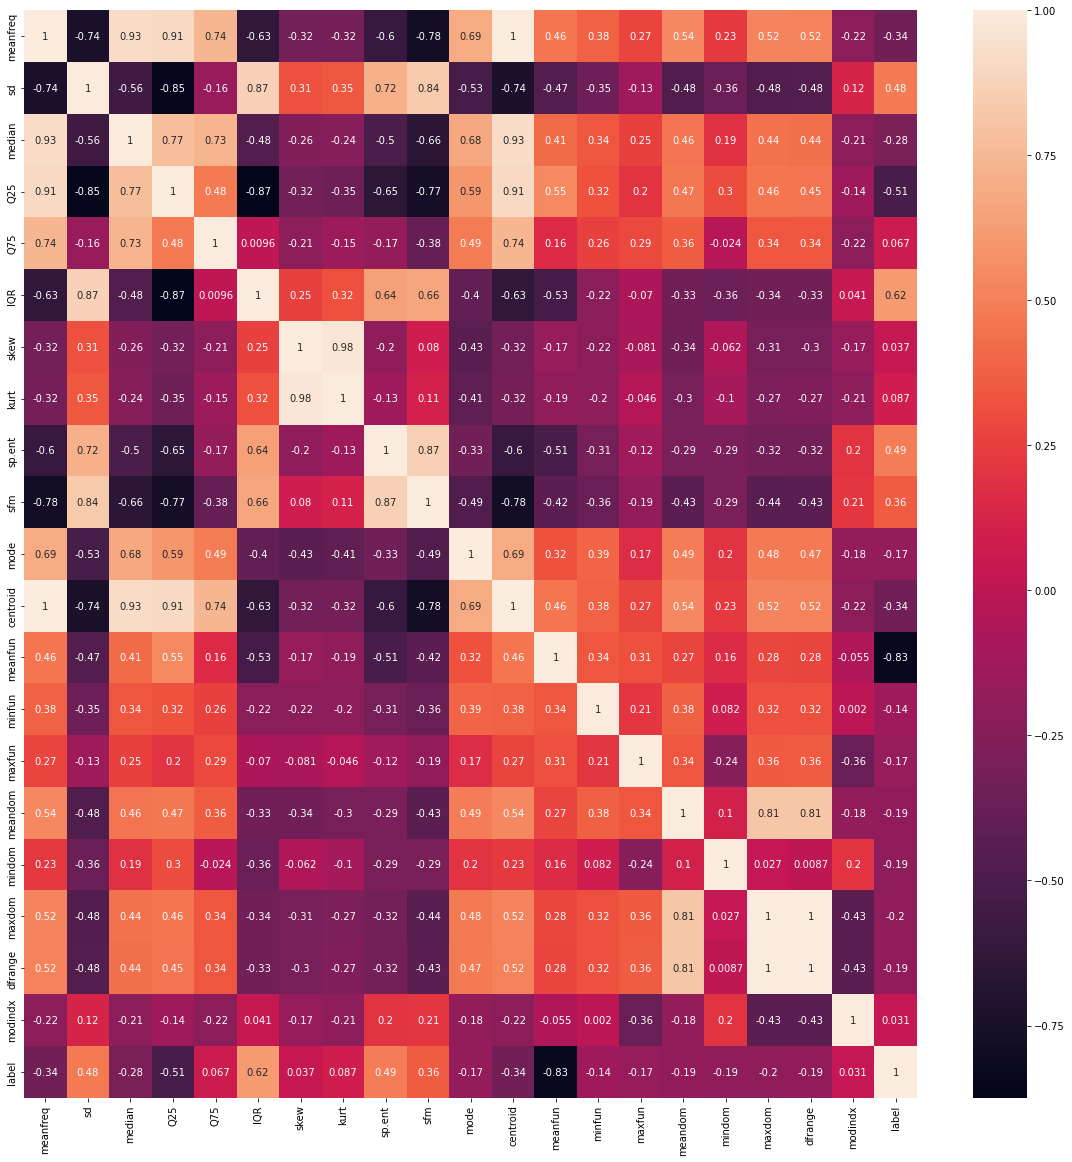

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

### 5. Data Preparation

In [8]:
X = df.drop(["label"],axis=1)
Y = df["label"]

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size =0.2,random_state=42)
print(X.shape, Y.shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape)


(3168, 20) (3168,) (2534, 20) (634, 20) (2534,) (634,)


In [9]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
print(X.shape, Y.shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape)


(3168, 20) (3168,) (2534, 20) (634, 20) (2534,) (634,)


### 6. Modelling & Model Evaluation

#### 6.1 Linear Kernel

In [10]:
model_linear = SVC(kernel='linear')
model_linear.fit(train_x,train_y)

SVC(kernel='linear')

In [11]:
pred_train = model_linear.predict(train_x)
pred_test = model_linear.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))
print(classification_report(pred_test,test_y))

Training-set accuracy score: 0.9771
Testing-set accuracy score: 0.9763
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       304
           1       0.97      0.99      0.98       330

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



#### 6.2 Polynomial Kernel

In [12]:
model_poly = SVC(kernel='poly', degree=2)
model_poly.fit(train_x,train_y)

SVC(degree=2, kernel='poly')

In [13]:
pred_train = model_poly.predict(train_x)
pred_test = model_poly.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))
print(classification_report(pred_test,test_y))

Training-set accuracy score: 0.9163
Testing-set accuracy score: 0.9148
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       285
           1       0.94      0.91      0.92       349

    accuracy                           0.91       634
   macro avg       0.91      0.92      0.91       634
weighted avg       0.92      0.91      0.91       634



#### 6.3 Radial Kernel

In [14]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(train_x,train_y)

SVC()

In [15]:
pred_train = model_rbf.predict(train_x)
pred_test = model_rbf.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))
print(classification_report(pred_test,test_y))

Training-set accuracy score: 0.9858
Testing-set accuracy score: 0.9826
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       300
           1       0.98      0.99      0.98       334

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



#### 6.4 Sigmoid Kernel

In [16]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(train_x,train_y)

SVC(kernel='sigmoid')

In [17]:
pred_train = model_sigmoid.predict(train_x)
pred_test = model_sigmoid.predict(test_x)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_y, pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(test_y, pred_test)))
print(classification_report(pred_test,test_y))

Training-set accuracy score: 0.7948
Testing-set accuracy score: 0.8281
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       314
           1       0.81      0.86      0.83       320

    accuracy                           0.83       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.83      0.83      0.83       634



### <font color=green>Inferences</font>
- rbf(radial basis Function) Kernel performed well among all kernels

### 7. Applying Cross Validation

In [18]:
scores = cross_val_score(model_rbf, train_x, train_y, cv=10)
print('Cross-Validation Accuracy Scores', scores)
print("Average Accuracy : ",np.average(scores))

Cross-Validation Accuracy Scores [0.97637795 0.98425197 0.99212598 0.97637795 0.98418972 0.98023715
 0.97233202 0.97628458 0.99209486 0.98814229]
Average Accuracy :  0.9822414490678784


### <font color=green>Inferences</font>
- No improvement of Accuracy after appling Cross Validation too

### 8. Hyper Parameter Tuning

In [19]:
model = SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

grid_search.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [20]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))


GridSearch CV best score : 0.9815


Parameters that give the best results : 

 {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=1, gamma=0.2)


### 9. Conclusion

- About Dataset
    - Data is clean and no empty fields are recognized
    - Outliers check is ignored as SVM is capable of considering Outliers too
- Highlights
    - SVC and SVM have been successfully Explained
    - SVM Kernals (Linear, Polynomial, Radial, Sigmoid) have been successfully used in Classifying voice dataset
    - Radial basis Function provided most optimal solution with default 
    - Hyper Parameter Tuning has been Explored
    
<img src="./Data/thank.jpg"/>
